In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    '../../../LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)


/home/ebicher/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [5]:
# Convert ID and Interest Rate to numeric.
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')
y2015 = y2015[:-2]
ny2015 = y2015


In [6]:
y2015.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.210950e+05,421095.000000,421095.000000,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000,...,421095.000000,421095.000000,421095.000000,416856.000000,421095.000000,421095.000000,4.210950e+05,4.210950e+05,421095.000000,4.210950e+05
mean,5.759576e+07,15240.285862,15240.285862,15234.156412,12.600388,441.860087,7.696561e+04,19.195989,0.347397,0.572690,...,0.094318,2.170947,93.924313,47.527110,0.133188,0.064556,1.734070e+05,5.222199e+04,21958.208958,4.347865e+04
std,1.013358e+07,8571.325901,8571.325901,8567.935752,4.318453,244.851179,7.394996e+04,23.504038,0.927695,0.867776,...,0.522758,1.853858,8.875399,36.054458,0.385975,0.444231,1.756722e+05,4.907494e+04,21840.371112,4.394271e+04
min,7.082500e+04,1000.000000,1000.000000,900.000000,5.320000,23.400000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000,0.000000e+00
25%,4.922617e+07,8500.000000,8500.000000,8500.000000,9.170000,263.930000,4.600000e+04,12.590000,0.000000,0.000000,...,0.000000,1.000000,90.900000,15.400000,0.000000,0.000000,5.090900e+04,2.259850e+04,7800.000000,1.548150e+04
50%,5.895358e+07,14000.000000,14000.000000,14000.000000,12.290000,385.410000,6.500000e+04,18.600000,0.000000,0.000000,...,0.000000,2.000000,97.400000,50.000000,0.000000,0.000000,1.114050e+05,3.959600e+04,15200.000000,3.297000e+04
75%,6.604584e+07,20000.000000,20000.000000,20000.000000,15.590000,578.790000,9.169050e+04,25.340000,0.000000,1.000000,...,0.000000,3.000000,100.000000,75.000000,0.000000,0.000000,2.496290e+05,6.565100e+04,28600.000000,5.829900e+04
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,6.000000,...,39.000000,30.000000,100.000000,100.000000,11.000000,85.000000,9.999999e+06,2.921551e+06,834300.000000,2.101913e+06


In [8]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())
    if column.nunique() >= 10:
        print('del')
        ny2015 = ny2015.drop(columns=[i])

    

id
421095
del
term
2
grade
7
sub_grade
35
del
emp_title
120812
del
emp_length
11
del
home_ownership
4
verification_status
3
issue_d
12
del
loan_status
7
pymnt_plan
1
url
421095
del
desc
34
del
purpose
14
del
title
27
del
zip_code
914
del
addr_state
49
del
earliest_cr_line
668
del
revol_util
1211
del
initial_list_status
2
last_pymnt_d
25
del
next_pymnt_d
4
last_credit_pull_d
26
del
application_type
2
verification_status_joint
3


In [10]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from numpy.core.umath_tests import inner1d

rfc = ensemble.RandomForestClassifier()
X = ny2015.drop('loan_status', 1)
Y = ny2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=5)


KeyboardInterrupt: 

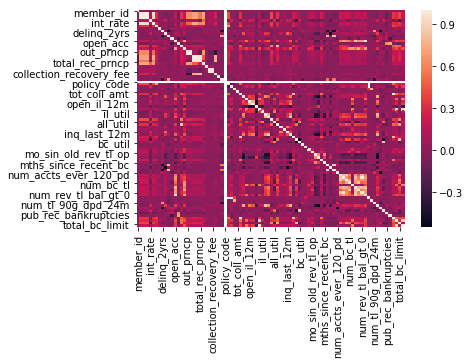

In [11]:
dfcorr = ny2015.corr()
sns.heatmap(dfcorr)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


X = ny2015.drop('loan_status', 1)
Y = ny2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)


clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

clf.fit(X,Y)

print(cross_val_score(clf, X, Y, cv=5))
print('\n\n\n')

listoff=[]
for feature in zip(list(ny2015), clf.feature_importances_):
    listoff.append(feature)
    print(feature)
    
    
    

[0.91828641 0.96198053 0.96090002 0.96067349 0.95984136]




('member_id', 0.010061313226625474)
('loan_amnt', 0.010346679055084015)
('funded_amnt', 0.005809902778542006)
('funded_amnt_inv', 0.009906069387385344)
('term', 0.004965148917021114)
('int_rate', 0.01243393549374795)
('installment', 0.003640585690732376)
('grade', 0.004037189407262566)
('home_ownership', 0.000984335484951098)
('annual_inc', 0.001276344609795789)
('verification_status', 0.0022650837966644902)
('loan_status', 0.0006754197444433965)
('pymnt_plan', 0.004089028567757103)
('dti', 0.003238047736183189)
('delinq_2yrs', 0.19796182165362894)
('inq_last_6mths', 0.1176367574679426)
('mths_since_last_delinq', 0.04671261551796298)
('mths_since_last_record', 0.023497075105927943)
('open_acc', 0.05217264280556942)
('pub_rec', 0.01854832458625308)
('revol_bal', 0.003996175038005188)
('total_acc', 0.014772518469858303)
('initial_list_status', 0.02192065802106185)
('out_prncp', 0.27211371127838196)
('out_prncp_inv', 0.000282144

In [13]:
listoff.sort(key=lambda tup: tup[1])

In [24]:
bestf = listoff[-40:]

In [25]:
bestfeature = [i[0] for i in bestf]

In [26]:
feature2015 = pd.DataFrame()
for i in bestfeature:
    feature2015[i] = ny2015[i]

In [27]:
feature2015 = feature2015.dropna(axis=1)
feature2015['loan_status'] = y2015['loan_status']
list(feature2015)

['verification_status',
 'tot_cur_bal',
 'tot_coll_amt',
 'policy_code',
 'dti',
 'total_rec_int',
 'collection_recovery_fee',
 'installment',
 'total_rec_late_fee',
 'total_rev_hi_lim',
 'collections_12_mths_ex_med',
 'revol_bal',
 'grade',
 'pymnt_plan',
 'recoveries',
 'term',
 'funded_amnt',
 'num_bc_sats',
 'funded_amnt_inv',
 'member_id',
 'loan_amnt',
 'int_rate',
 'total_acc',
 'pub_rec',
 'initial_list_status',
 'open_acc',
 'num_actv_rev_tl',
 'inq_last_6mths',
 'delinq_2yrs',
 'out_prncp',
 'loan_status']

In [28]:
X = feature2015.drop('loan_status', 1)
Y = feature2015['loan_status']
X = pd.get_dummies(X)


clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

clf.fit(X,Y)

print(cross_val_score(clf, X, Y, cv=10))

[0.90653273 0.90696018 0.90413431 0.90342191 0.91092377 0.91351223
 0.91339144 0.91595621 0.91851711 0.91877642]
